In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
import pickle

/Users/chandu/Desktop/ML_Learnings/datascience/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(X_train.shape, y_test.shape)

(60000, 28, 28) (10000,)


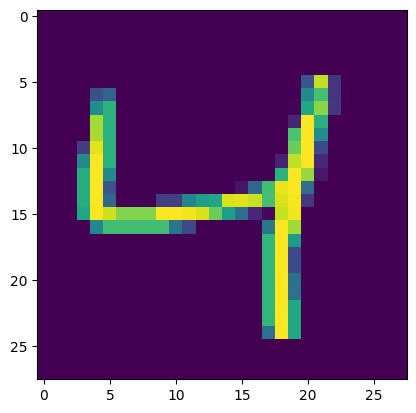

In [4]:
import matplotlib.pyplot as plt 
plt.imshow(X_train[2])

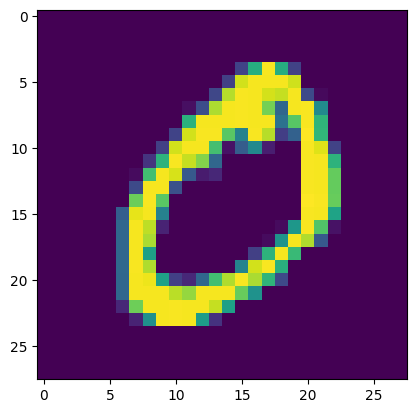

In [5]:
import matplotlib.pyplot as plt 
plt.imshow(X_train[1])

In [6]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [7]:
# Normalise the data : Bring everything to Zeros and Ones 
X_train = X_train/255
y_train = y_train/255

In [8]:
X_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
# Create a Model 

model = Sequential(
    [
        Flatten(input_shape=(28,28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Compile Model 
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [23]:
# Setup Tensorboard
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

log_dir = 'logs/fit/'+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [27]:
## Set up Early Stopping
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [28]:
## Set up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [29]:
# Train Model
## Train the model 
historty = model.fit(
    X_train,y_train, validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
1875/1875 [==============================] - 1s 794us/step - loss: 5.7618e-11 - accuracy: 0.0987 - val_loss: 11774.5879 - val_accuracy: 0.0980
Epoch 2/100
1875/1875 [==============================] - 1s 687us/step - loss: 4.5697e-11 - accuracy: 0.0987 - val_loss: 11829.9717 - val_accuracy: 0.0980
Epoch 3/100
1875/1875 [==============================] - 1s 692us/step - loss: 4.1723e-11 - accuracy: 0.0987 - val_loss: 11880.4404 - val_accuracy: 0.0980
Epoch 4/100
1875/1875 [==============================] - 1s 680us/step - loss: 3.7750e-11 - accuracy: 0.0987 - val_loss: 11926.6338 - val_accuracy: 0.0980
Epoch 5/100
1875/1875 [==============================] - 1s 707us/step - loss: 3.1789e-11 - accuracy: 0.0987 - val_loss: 11966.9004 - val_accuracy: 0.0980
Epoch 6/100
1875/1875 [==============================] - 1s 727us/step - loss: 2.7815e-11 - accuracy: 0.0987 - val_loss: 12002.8506 - val_accuracy: 0.0980
Epoch 7/100
1875/1875 [==============================] - 1s 702us/step

In [30]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 324us/step


In [31]:
y_pred = y_prob.argmax(axis=1)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.098

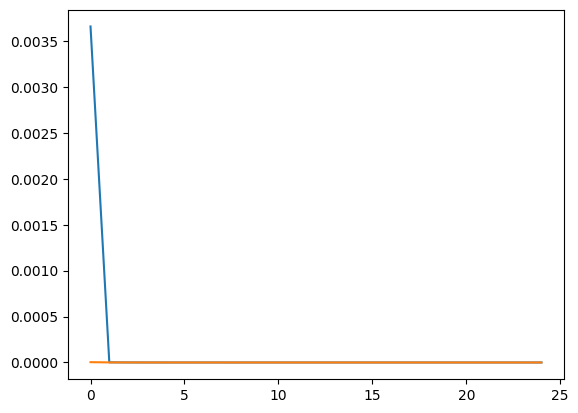

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [33]:

%load_ext tensorboard

In [34]:
%tensorboard --logdir logs/fit/

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
/Users/chandu/Desktop/ML_Learnings/datascience/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Traceback (most recent call last):
  File "/Users/chandu/Desktop/ML_Learnings/datascience/.venv/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/Users/chandu/Desktop/ML_Learnings/datascience/.venv/lib/python3.9/site-packages/tensorboard/main.py", line 46, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/Users/chandu/Desktop/ML_Learnings/datascience/.venv/lib/python3.9/site-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/Users/chandu/Desktop/ML_Learnings/datascience/.venv/lib/python3.9/site-packages/absl/app.py", line 254, in _run_main
  